In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# import the dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Information
* age: age of primary beneficiary
  
* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
   objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [4]:
#Basic Check
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### not null value is this dataset

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Insight of medical data
- In age Columns 39 is average age of the patient .
- the average charges of patient around 13270.
- Every patient have one - two children cover by health insurances
- The average BMI is above 30
- Medical charges are highly skewed with a few individuals incurring very large charges.
- Median is significantly lower than the mean, showing right-skewed distribution (a few people with very high expenses).
  ******

## Imputation Methods

- We can impute missing value by the help of __Measure of Central Tendency__.
- 1. Mean   2. Median   3. Mode
- We can use __Mean__ when we our distribution is following normal distribution.
- We can use __Median__ when our distribution is skewed or not following normal distribution.
- We can use  __Mode__ when our distribution value or element has categorical data or discrete data.


## step1 - Imputation Method 

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## * Here we have not null value is this data
* now going to next step to check the outlier and replace 

# Checking the Outlier and replace it

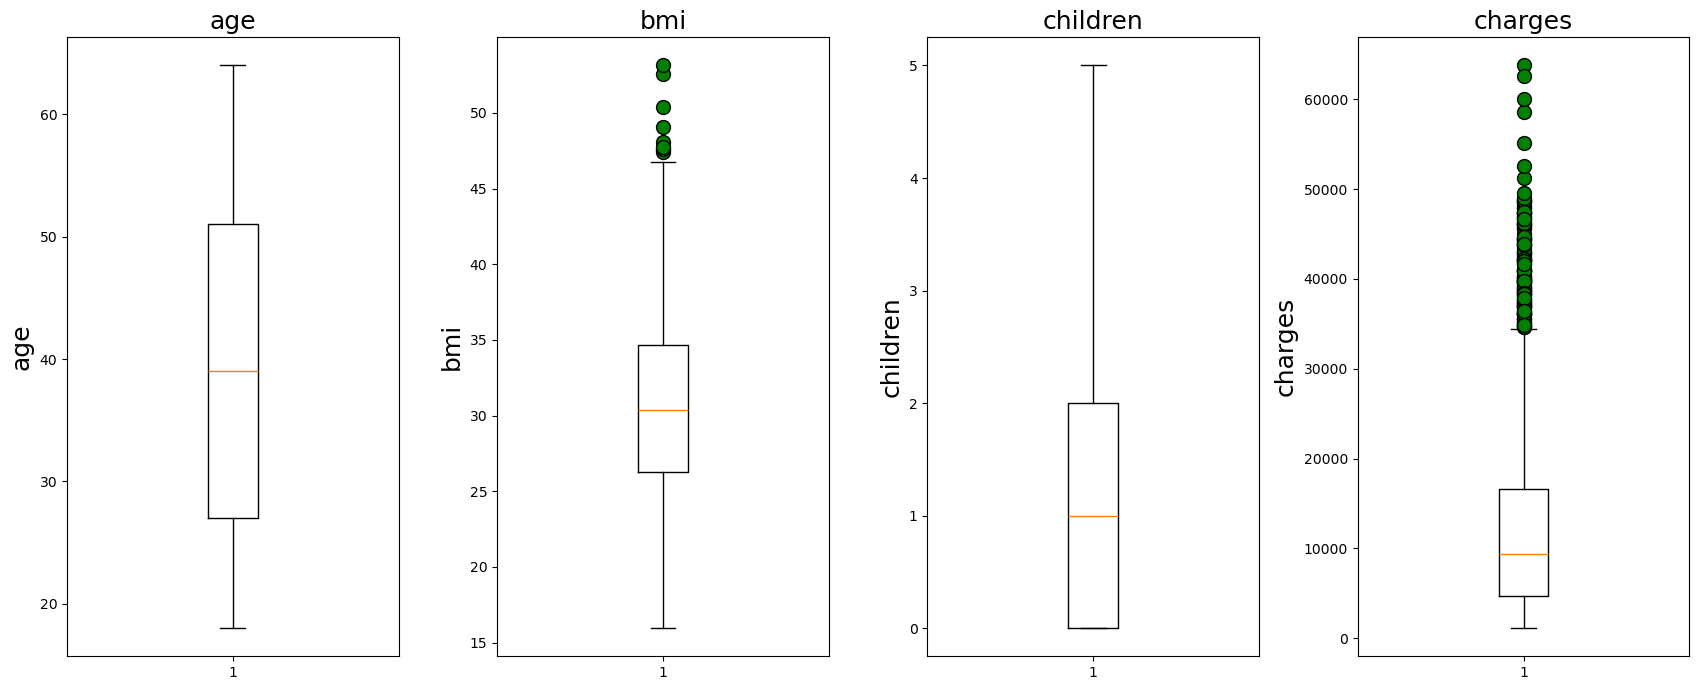

In [10]:
plt.figure(figsize=(30, 7))
plot_num = 1
flierprops = dict(marker='o', markerfacecolor='green', markersize=10)

for i in df.select_dtypes(include='number'):
    if plot_num <= 7:
        plt.subplot(1, 7, plot_num)
        plt.boxplot(df[i], flierprops=flierprops)
        plt.title(i, fontsize=18)
        plt.ylabel(i, fontsize=18)
        plot_num += 1

plt.tight_layout()
plt.show()

### no outlier in age columns

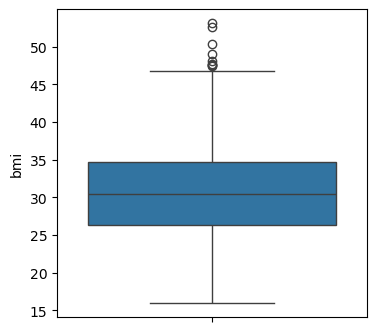

In [11]:
plt.figure(figsize=(4,4))
sns.boxplot(df.bmi)
plt.show()

- to replace this outlier point from median 

In [12]:
df.loc[df["bmi"]>47,"bmi"]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [13]:
df.loc[df["bmi"]>47,"bmi"].count()

9

#### Here we can see that in bmi columns there 5 outlier points

In [14]:
df["bmi"].median()

30.4

In [15]:
df.loc[df["bmi"]>48,"bmi"]= df["bmi"].median()

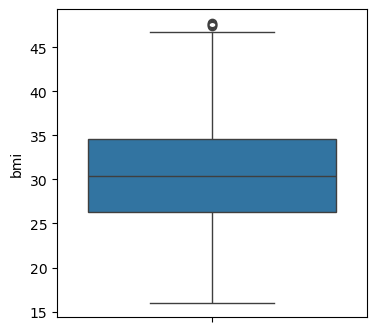

In [16]:
plt.figure(figsize=(4,4))
sns.boxplot(df.bmi)
plt.show()

## Method 2 - interquantile Method

In [17]:

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
Q1,Q3,IQR,lower_bound,upper_bound

(26.29625, 34.56, 8.263750000000002, 13.900624999999998, 46.955625000000005)

In [19]:
df.loc[df["bmi"]>upper_bound,"bmi"]= df["bmi"].median()

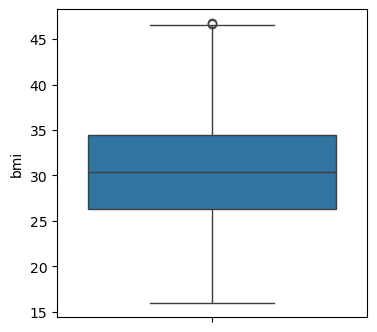

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(df.bmi)
plt.show()

## Now we can replace the outlier in Charges Columns 

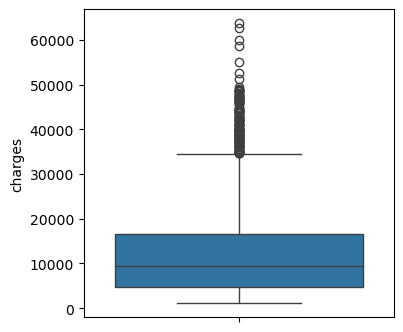

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(df.charges)
plt.show()

In [22]:
# Q1 = df.bmi.quantile(0.25)
# Q3 = df.bmi.quantile(0.75)

# IQR = Q3-Q1

# Lower_bound = Q1 - 1.5 * IQR
# Upper_bound = Q3 + 1.5 * IQR


# Eda - explortary data analysis

<Axes: xlabel='age', ylabel='Count'>

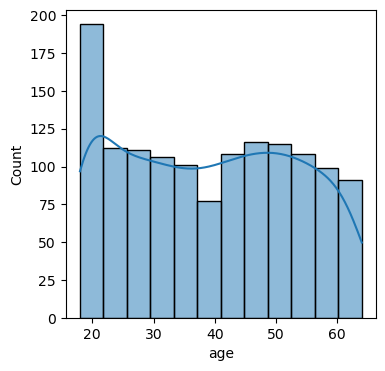

In [23]:
plt.figure(figsize=(4,4))
sns.histplot(df["age"],kde=1)

<Axes: xlabel='bmi', ylabel='Count'>

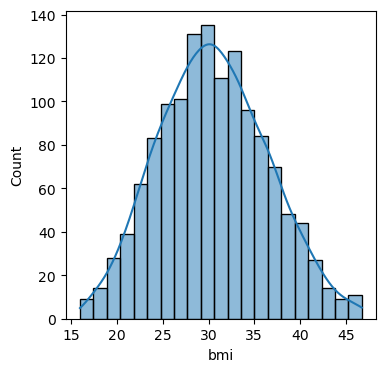

In [24]:
plt.figure(figsize=(4,4))
sns.histplot(df["bmi"],kde=1)

### this graph is show the perfect normal distribution

<Axes: xlabel='charges', ylabel='Count'>

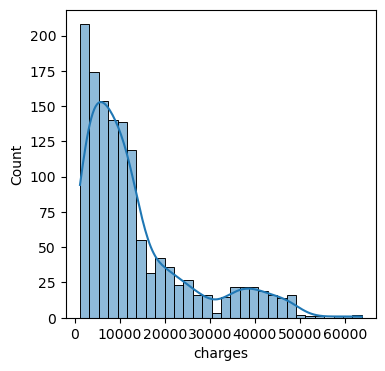

In [25]:
plt.figure(figsize=(4,4))
sns.histplot(df["charges"],kde=1)

## This Graph is show the few Right postive skewness and so many outlier are present but we can't replace it because it is the target varable

## Bivariant eda perform

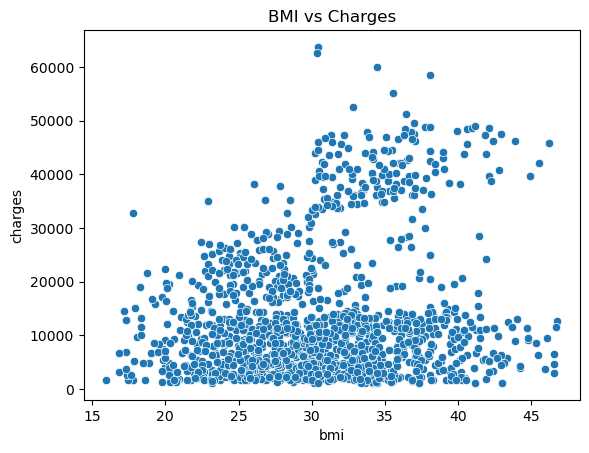

In [26]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()

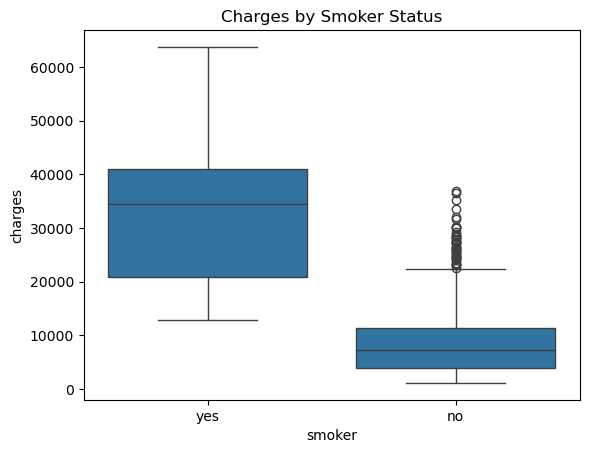

In [27]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

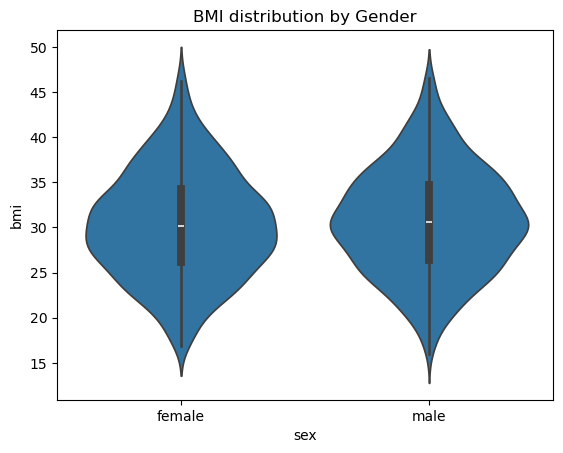

In [28]:
sns.violinplot(x='sex', y='bmi', data=df)
plt.title('BMI distribution by Gender')
plt.show()

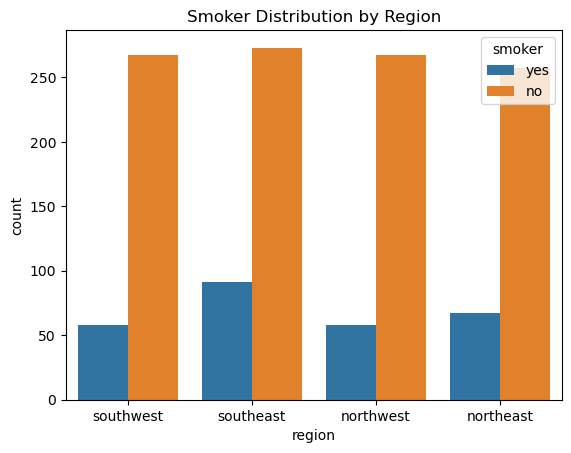

In [29]:
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Smoker Distribution by Region')
plt.show()

# Multivariant

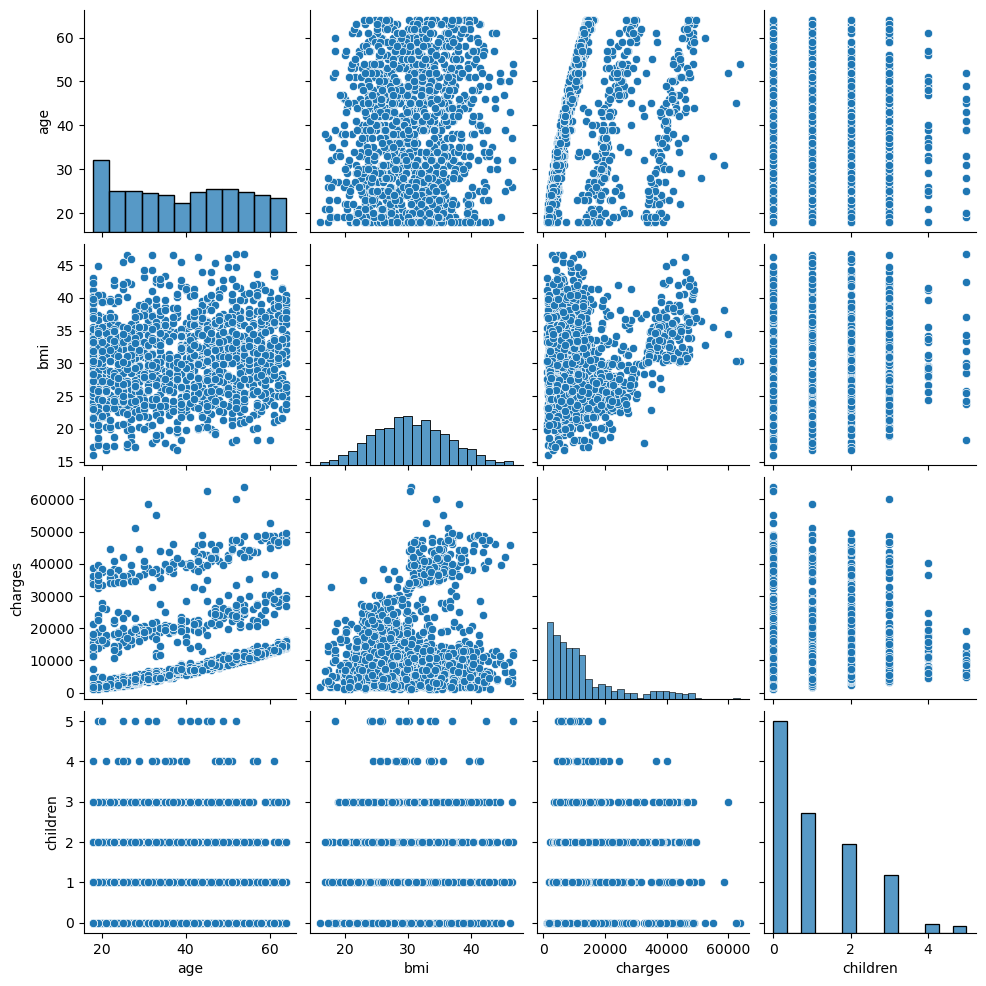

In [30]:
sns.pairplot(df[['age', 'bmi', 'charges', 'children']])
plt.show()

# Data PreProcesing

-- Now we can convert categorical value to numerical value -->
*  sex
*  region

To convert categorical data into numerical we are going to use some technique which are >>>>

1)Label Encoder --> Gender , smokers

2)Ordinal Encoder --> no

3)One Hot Encoder --> region


In [31]:
from sklearn.preprocessing import LabelEncoder
Lr = LabelEncoder()

In [32]:
df.sex

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [33]:
df["sex"] = Lr.fit_transform(df.sex)

In [34]:
df["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [35]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [36]:
df["smoker"] = Lr.fit_transform(df.smoker)

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [38]:
# df.drop(columns=["smokers"])

# One - Hot Encoding --> region

In [39]:
region = pd.get_dummies(df.region,dtype=int)

In [40]:
region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [41]:
df1 = pd.concat([region,df],axis=1)

In [42]:
df1

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,region,charges
0,0,0,0,1,19,0,27.900,0,1,southwest,16884.92400
1,0,0,1,0,18,1,33.770,1,0,southeast,1725.55230
2,0,0,1,0,28,1,33.000,3,0,southeast,4449.46200
3,0,1,0,0,33,1,22.705,0,0,northwest,21984.47061
4,0,1,0,0,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,50,1,30.970,3,0,northwest,10600.54830
1334,1,0,0,0,18,0,31.920,0,0,northeast,2205.98080
1335,0,0,1,0,18,0,36.850,0,0,southeast,1629.83350
1336,0,0,0,1,21,0,25.800,0,0,southwest,2007.94500


In [43]:
final_df = df1.drop(columns=["region"])

In [44]:
final_df

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,0,0,0,1,19,0,27.900,0,1,16884.92400
1,0,0,1,0,18,1,33.770,1,0,1725.55230
2,0,0,1,0,28,1,33.000,3,0,4449.46200
3,0,1,0,0,33,1,22.705,0,0,21984.47061
4,0,1,0,0,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,50,1,30.970,3,0,10600.54830
1334,1,0,0,0,18,0,31.920,0,0,2205.98080
1335,0,0,1,0,18,0,36.850,0,0,1629.83350
1336,0,0,0,1,21,0,25.800,0,0,2007.94500


## Scaling applying --> age ,bmi,charges

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
final_df[["age","bmi","charges"]] = scaler.fit_transform(final_df[["age","bmi","charges"]])

In [47]:
final_df

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,0,0,0,1,0.021739,0,0.387788,0,1,0.251611
1,0,0,1,0,0.000000,1,0.578435,1,0,0.009636
2,0,0,1,0,0.217391,1,0.553426,3,0,0.053115
3,0,1,0,0,0.326087,1,0.219065,0,0,0.333010
4,0,1,0,0,0.304348,1,0.419617,0,0,0.043816
...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,0.695652,1,0.487496,3,0,0.151299
1334,1,0,0,0,0.000000,0,0.518350,0,0,0.017305
1335,0,0,1,0,0.000000,0,0.678467,0,0,0.008108
1336,0,0,0,1,0.065217,0,0.319584,0,0,0.014144


# To select the Feature using by correlation - clotest to 0.5 and > 0.5 

# Correlation relationship

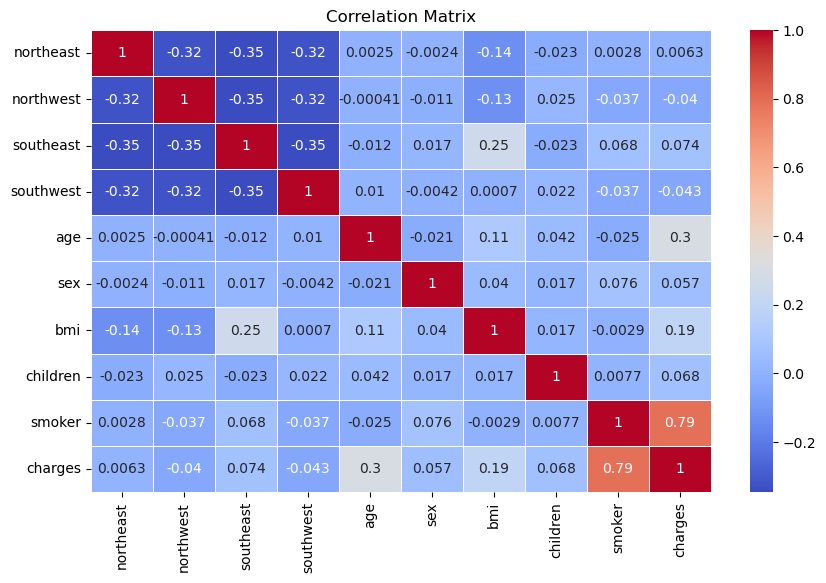

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
final = final_df[["age","bmi","smoker","charges","children","southeast","sex"]]

In [50]:
final

,age,bmi,smoker,charges,children,southeast,sex
0,0.021739,0.387788,1,0.251611,0,0,0
1,0.000000,0.578435,0,0.009636,1,1,1
2,0.217391,0.553426,0,0.053115,3,1,1
3,0.326087,0.219065,0,0.333010,0,0,1
4,0.304348,0.419617,0,0.043816,0,0,1
...,...,...,...,...,...,...,...
1333,0.695652,0.487496,0,0.151299,3,0,1
1334,0.000000,0.518350,0,0.017305,0,0,0
1335,0.000000,0.678467,0,0.008108,0,1,0
1336,0.065217,0.319584,0,0.014144,0,0,0


# Apply the Linear Regression

In [51]:
# Defining X or Y
X = final.drop(columns=["charges"])
Y = final["charges"]

In [52]:
X

,age,bmi,smoker,children,southeast,sex
0,0.021739,0.387788,1,0,0,0
1,0.000000,0.578435,0,1,1,1
2,0.217391,0.553426,0,3,1,1
3,0.326087,0.219065,0,0,0,1
4,0.304348,0.419617,0,0,0,1
...,...,...,...,...,...,...
1333,0.695652,0.487496,0,3,0,1
1334,0.000000,0.518350,0,0,0,0
1335,0.000000,0.678467,0,0,1,0
1336,0.065217,0.319584,0,0,0,0


In [53]:
Y

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [54]:
y_log = np.log1p(Y)

# Spliting dataset training (80%)and testing (20%)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train_log,y_test_log = train_test_split(X,y_log,test_size=0.2,random_state=33)

In [56]:
X_train

,age,bmi,smoker,children,southeast,sex
1219,0.434783,0.462813,0,3,0,0
162,0.782609,0.767782,0,1,0,1
196,0.456522,0.546931,0,0,0,0
673,0.500000,0.489120,0,0,1,0
923,0.347826,0.644852,0,0,0,1
...,...,...,...,...,...,...
1225,0.326087,0.774927,0,1,1,0
658,0.652174,0.647938,0,1,0,0
578,0.739130,0.462488,0,1,0,1
391,0.021739,0.697304,0,0,0,0


In [57]:
X_test

,age,bmi,smoker,children,southeast,sex
663,0.000000,0.574862,0,0,1,1
526,0.021739,0.475154,0,2,0,0
790,0.456522,0.839234,0,0,1,0
20,0.913043,0.651023,0,0,0,0
229,0.630435,0.308542,0,2,0,1
...,...,...,...,...,...,...
386,0.869565,0.749919,0,0,1,0
572,0.260870,0.882105,0,2,1,0
129,0.434783,0.608639,0,2,0,1
583,0.304348,0.249756,0,1,1,0


In [58]:
y_train_log

1219    0.097491
162     0.138809
196     0.069781
673     0.077723
923     0.049795
          ...   
1225    0.056986
658     0.338875
578     0.128671
391     0.016090
1044    0.151833
Name: charges, Length: 1070, dtype: float64

In [59]:
y_test_log

663    0.000232
526    0.311985
790    0.069968
20     0.176683
229    0.121639
         ...   
386    0.158153
572    0.056352
129    0.076202
583    0.233841
606    0.038158
Name: charges, Length: 268, dtype: float64

In [60]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [61]:
Lr.fit(X_train,y_train_log)

LinearRegression()

In [62]:
y_predict=Lr.predict(X_test)

In [63]:
y_predict

array([ 0.02475391,  0.04697932,  0.13445134,  0.19633072,  0.12006503,
        0.09692043,  0.15750993,  0.39879242,  0.18094264,  0.47895824,
        0.33858202,  0.13605928,  0.13341259,  0.38315513,  0.06132568,
        0.38344676,  0.23067156,  0.22438004,  0.19901856,  0.0707058 ,
        0.1936424 ,  0.03393129,  0.07613116,  0.071315  ,  0.02112749,
        0.10386793,  0.12496012,  0.16993191,  0.01671273,  0.15471581,
        0.15543166,  0.4830205 ,  0.01573265,  0.07372673,  0.10081615,
        0.08502263,  0.13086575,  0.11349068,  0.1079169 ,  0.13944698,
        0.1478923 ,  0.10462366,  0.01234609,  0.07243785,  0.19463118,
        0.38996264,  0.10523462,  0.3789282 ,  0.44105521,  0.12540246,
        0.21388466,  0.13792209,  0.15652498,  0.11802712, -0.00453021,
        0.11266349,  0.11687143,  0.3758047 ,  0.0547047 , -0.0057633 ,
        0.15488524,  0.13493617,  0.19682214, -0.00655119,  0.14911035,
        0.30888321,  0.00994788,  0.37076588,  0.35810521,  0.12

In [64]:
y_test_log

663    0.000232
526    0.311985
790    0.069968
20     0.176683
229    0.121639
         ...   
386    0.158153
572    0.056352
129    0.076202
583    0.233841
606    0.038158
Name: charges, Length: 268, dtype: float64

In [65]:
# Regression matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_error

In [66]:
mean_absolute_error(y_predict,y_test_log)

0.04865976836810807

In [67]:
r2_score(y_predict,y_test_log)

0.666849442146771

In [68]:
X_train

,age,bmi,smoker,children,southeast,sex
1219,0.434783,0.462813,0,3,0,0
162,0.782609,0.767782,0,1,0,1
196,0.456522,0.546931,0,0,0,0
673,0.500000,0.489120,0,0,1,0
923,0.347826,0.644852,0,0,0,1
...,...,...,...,...,...,...
1225,0.326087,0.774927,0,1,1,0
658,0.652174,0.647938,0,1,0,0
578,0.739130,0.462488,0,1,0,1
391,0.021739,0.697304,0,0,0,0


In [69]:
y_train_log

1219    0.097491
162     0.138809
196     0.069781
673     0.077723
923     0.049795
          ...   
1225    0.056986
658     0.338875
578     0.128671
391     0.016090
1044    0.151833
Name: charges, Length: 1070, dtype: float64

In [70]:
y_p = Lr.predict(X_train)

In [71]:
y_p

array([0.11927269, 0.19105143, 0.11070644, ..., 0.14828136, 0.05839925,
       0.17797242])

In [72]:
r2_score(y_train_log,y_p)

0.7721707389076845

In [73]:
y_tp = Lr.predict(X_test)

In [74]:
y_tp

array([ 0.02475391,  0.04697932,  0.13445134,  0.19633072,  0.12006503,
        0.09692043,  0.15750993,  0.39879242,  0.18094264,  0.47895824,
        0.33858202,  0.13605928,  0.13341259,  0.38315513,  0.06132568,
        0.38344676,  0.23067156,  0.22438004,  0.19901856,  0.0707058 ,
        0.1936424 ,  0.03393129,  0.07613116,  0.071315  ,  0.02112749,
        0.10386793,  0.12496012,  0.16993191,  0.01671273,  0.15471581,
        0.15543166,  0.4830205 ,  0.01573265,  0.07372673,  0.10081615,
        0.08502263,  0.13086575,  0.11349068,  0.1079169 ,  0.13944698,
        0.1478923 ,  0.10462366,  0.01234609,  0.07243785,  0.19463118,
        0.38996264,  0.10523462,  0.3789282 ,  0.44105521,  0.12540246,
        0.21388466,  0.13792209,  0.15652498,  0.11802712, -0.00453021,
        0.11266349,  0.11687143,  0.3758047 ,  0.0547047 , -0.0057633 ,
        0.15488524,  0.13493617,  0.19682214, -0.00655119,  0.14911035,
        0.30888321,  0.00994788,  0.37076588,  0.35810521,  0.12

In [75]:
r2_score(y_test_log,y_tp)

0.7187288692388933

# Apply the SVM (SUPPORT VECTOR MACHINE) ALGO ON Regression task

In [76]:
X = final_df.drop(columns=["charges"])
Y = final_df["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

### StandardScaler standardizes features and target to have mean 0 and variance 1 — essential for SVR to perform well.

### fit_transform is used on training data to learn scaling; transform applies the same scaling to test data.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and scale the target values y_train.
# reshape(-1, 1) makes it 2D (required by fit_transform).
#.ravel() flattens it back to 1D for SVR.
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [78]:
from sklearn.svm import SVR

svregression = SVR()
svregression.fit(X_train_scaled, y_train_scaled)


SVR()

In [79]:
from sklearn.metrics import mean_squared_error, r2_score 

y_pred_scaled = svregression.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.8148359468698552
RMSE: 0.07692491807444861


C:\Users\tesla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Hyper Parameter Tuning

### GridSearchCV --> GridSearchCV is a method to find the best hyperparameters by exhaustively testing all possible combinations from a predefined parameter grid.
### It uses cross-validation to evaluate each combination and selects the one that gives the best performance.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}
# Create the model
svr = SVR()


In [84]:
# Set up GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit on scaled training data
grid_search.fit(X_train_scaled, y_train_scaled)

# Best model
best_svr = grid_search.best_estimator_

In [85]:
# Predict and evaluate
y_pred_scaled = best_svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

### RandomSearchCV --> RandomizedSearchCV is a technique used to tune hyperparameters of a machine learning model.
### Instead of trying every possible combination (like GridSearchCV), it tries a random selection of combinations from the parameter grid.



In [91]:
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

model = SVR()

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,               # only 10 random combinations test karenge
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train_scaled)

# Best model
best_svr = random_search.best_estimator_

# Predict and inverse scale
y_pred_scaled = best_svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluate the model
print(" Best Parameters:", random_search.best_params_)
print(" R2 Score:", r2_score(y_test, y_pred))
print(" RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.1, 'C': 10}
 R2 Score: 0.797026874916766
 RMSE: 0.08053932255188088


C:\Users\tesla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Apply the Decision Tree on Regression task

In [98]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [99]:
y_pred = dt.predict(X_test_scaled)

In [100]:
y_pred

array([2.24535110e-04, 3.97408639e-01, 7.22736728e-02, 1.99745456e-01,
       1.32890161e-01, 1.19427329e-01, 8.83007562e-02, 5.41872053e-01,
       4.36515184e-01, 7.40234491e-01, 5.38029657e-01, 3.89398288e-01,
       1.70933447e-01, 2.98110322e-01, 6.31813799e-02, 5.96817515e-01,
       1.64246586e-01, 2.16617856e-01, 3.30017616e-01, 6.60132402e-02,
       1.99745456e-01, 1.73319810e-02, 4.81359681e-02, 6.17811944e-02,
       1.64806214e-02, 8.18624017e-02, 1.05672605e-01, 1.71095747e-01,
       1.56785662e-02, 1.86653487e-01, 1.45408400e-01, 7.30541797e-01,
       9.63595104e-03, 6.61778122e-02, 5.62644286e-02, 4.05032827e-02,
       1.25562113e-01, 6.52481930e-02, 9.01588022e-02, 1.45408400e-01,
       1.32661504e-01, 8.28443397e-02, 2.24535110e-04, 5.28858223e-02,
       1.39728787e-01, 3.32917548e-01, 7.52554718e-02, 3.27829692e-01,
       6.47328702e-01, 8.74454667e-02, 1.97114374e-01, 1.69514720e-01,
       1.48674175e-01, 1.44215767e-01, 2.24417749e-02, 1.09063061e-01,
      

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.10990401468746225
R² Score: 0.6220366339843937


C:\Users\tesla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Hyperparameter Tunning in decision tree on regression task

In [103]:
params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],  # regression criteria
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 15)),
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": list(range(1, 15))
}


In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#  Initialize Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=3)


#  GridSearchCV setup
tree_cv = GridSearchCV(
    estimator=tree_reg,
    param_grid=params,
    scoring='neg_mean_squared_error',  # Use regression scoring
    n_jobs=-1,
    verbose=2,
    cv=3
)

#  Fit the model
tree_cv.fit(X_train_scaled, y_train)

#  Best parameters
print("Best Parameters:", tree_cv.best_params_)


Fitting 3 folds for each of 7840 candidates, totalling 23520 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 9, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'best'}


In [107]:
y_train_pred = tree_cv.predict(X_train_scaled)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

print("Train RMSE:", train_rmse)
print("Train R² Score:", train_r2)

Train RMSE: 0.0722977867937635
Train R² Score: 0.8648154765644851


C:\Users\tesla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Applying XGBoost Model

In [108]:
!pip install xgboost

In [109]:
from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb_model.predict(X_test_scaled)


In [110]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(" XGBoost RMSE:", rmse)
print(" XGBoost R² Score:", r2)


 XGBoost RMSE: 0.08848963861908021
 XGBoost R² Score: 0.7549766705594294


C:\Users\tesla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
